In [1]:
import numpy as np
import qiskit
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [2]:
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import math

In [3]:
from qiskit.providers.fake_provider import FakeVigo
from qiskit.providers.fake_provider import FakePerth
from qiskit_aer.noise import NoiseModel
noise_model = NoiseModel.from_backend(FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False)
device_backend = FakeVigo()
sim_vigo = AerSimulator.from_backend(FakePerth(),noise_model=noise_model)


In [11]:
simulator = Aer.get_backend('aer_simulator')

count_ratio=[]
for t in range (1,300,10):
    
    t=t/10**6
    circ = QuantumCircuit(1, 1)
    
    circ.x(0)
    circ.barrier(0)
    circ.delay(t, unit='s')
    circ.barrier(0)
    circ.measure(0, 0)
    circ = transpile(circ, simulator)
    result_noise = sim_vigo.run(circ).result()
    counts_noise = result_noise.get_counts(0)
    count_ratio.append(counts_noise['1']/(counts_noise['1']+counts_noise['0']))

In [24]:
circ = QuantumCircuit(1, 30)
i=0
for t in range (1,300,10):
    
    t=t/10**6
    circ.x(0)
    circ.barrier(0)
    circ.delay(t, unit='s')
    circ.barrier(0)
    circ.measure(0, i)
    i=i+1
    circ.reset(0)

c:\Users\Tim\.conda\envs\qiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


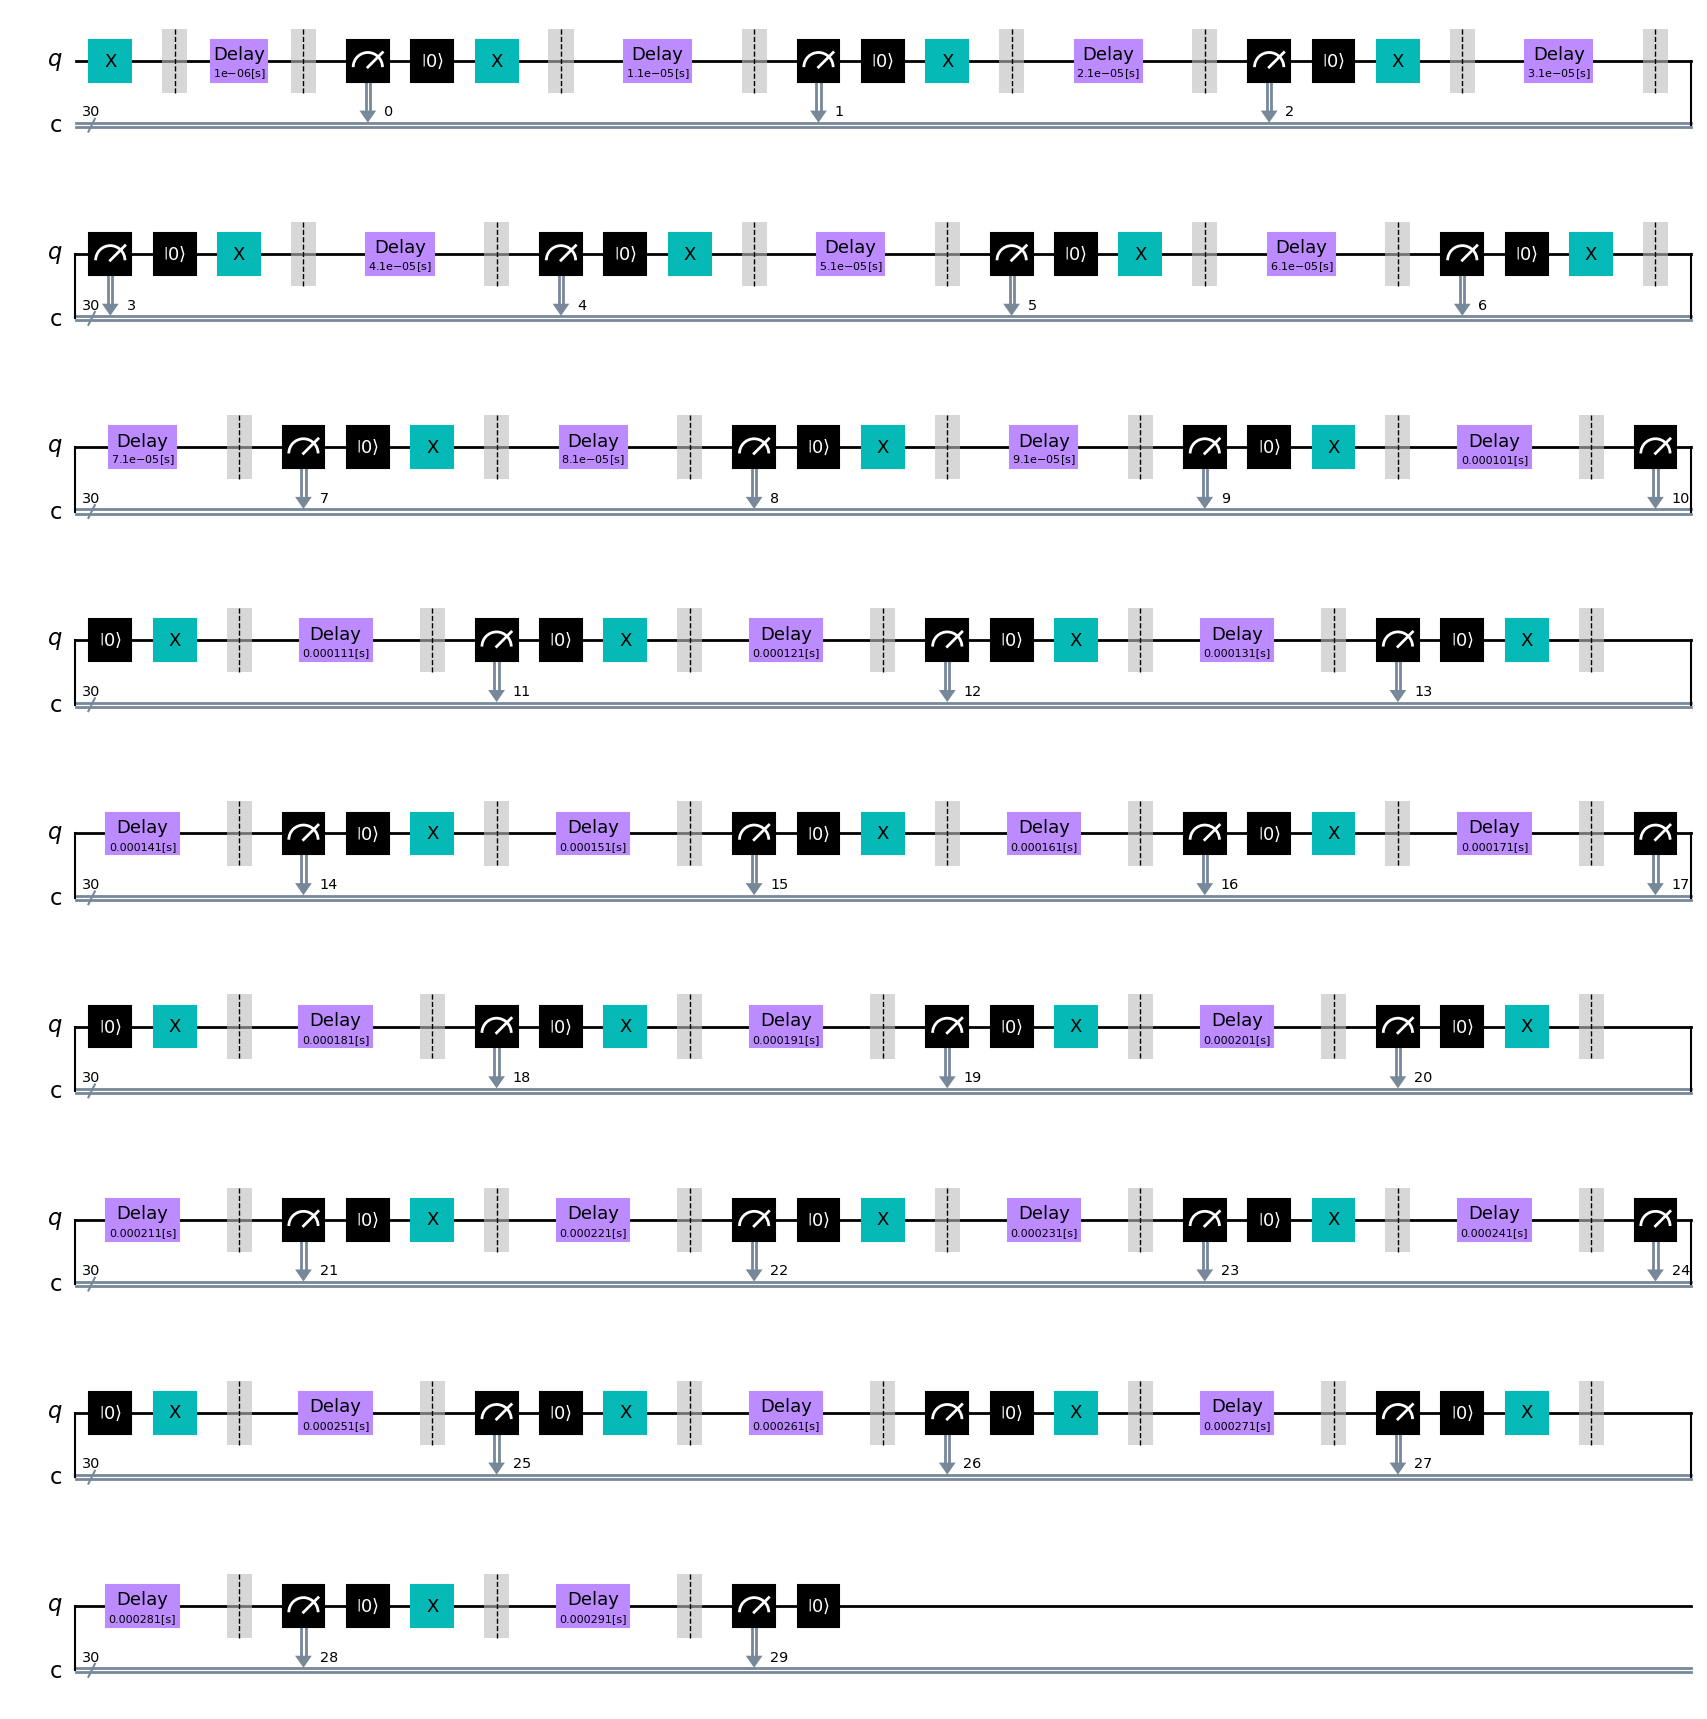

In [25]:
circ.draw(output='mpl')

In [30]:
simulator = Aer.get_backend('aer_simulator')

count_ratio=[]
result_noise = sim_vigo.run(circ).result()
counts_noise = result_noise.get_counts(0)


{'101001100010010101100011111111': 1, '011001100000110000111101110111': 1, '000000011000110001001111111111': 1, '001001100010001111000110110111': 1, '000100100000011110111101111111': 1, '110000011000101101111001011111': 1, '001100000010110100011011111111': 1, '001010010000001111010011111111': 1, '010010000101100110000111011111': 1, '000001001000011011101111110111': 1, '100001100001010110010001011111': 1, '000101000110110111101111111111': 1, '001011100100001110101010111111': 1, '001100010001011101111100111111': 1, '001000000000100011100111110111': 1, '010000010010010110110111101111': 1, '101010000000110011110111111111': 1, '101000010010001100011110101111': 1, '001111000000000111101001100111': 1, '110000000001100111011111111111': 1, '000001010000010000000111111111': 1, '000100001010000011111111111111': 1, '001101000101101011111111111111': 1, '000011000010111010011111111111': 1, '000000000000101110111111000111': 1, '100111000100010000001011011111': 1, '110100001101110110101110111111': 1, 

In [72]:

n = 0
total=np.zeros(30)
for i in counts_noise:
    rev=''.join(reversed(i))
    for j in range(0,30):
        if rev[j] == '1':
            total[j]=total[j]+1
count_ratio=total/1024

In [73]:
print(count_ratio)

[0.99316406 0.9453125  0.89453125 0.86035156 0.82226562 0.765625
 0.71777344 0.68945312 0.64160156 0.6328125  0.58496094 0.58496094
 0.54980469 0.5234375  0.54394531 0.46777344 0.46386719 0.43066406
 0.41796875 0.37304688 0.38183594 0.33691406 0.33496094 0.32421875
 0.33300781 0.265625   0.25390625 0.24121094 0.25878906 0.24511719]


In [27]:
result_noise

Result(backend_name=''aer_simulator(fake_perth)', backend_version='1.1.26', qobj_id='', job_id='08eee9f2-021c-46e0-82d5-6ad49e312d08', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1410f9d7': 1, '0x30a5a77f': 1, '0x1447f2ff': 1, '0x204697bf': 1, '0x1740e3f': 1, '0x34287ff': 1, '0x20feaddf': 1, '0x12c02fff': 1, '0x1a25cd8d': 1, '0x200741ff': 1, '0x113ad5ed': 1, '0x40215df': 1, '0x1ea2b9f': 1, '0x21113b7f': 1, '0x32448fff': 1, '0xe200bf': 1, '0x34cce4ef': 1, '0x402d1e7': 1, '0x108a3ef': 1, '0x2e504fff': 1, '0x20402bf': 1, '0x804e5f': 1, '0x2030d7f7': 1, '0x8b9e65b': 1, '0x27ff': 1, '0x417dfb7': 1, '0x2449989b': 1, '0x186aef': 1, '0x2b8b7f': 1, '0x4704b57': 1, '0x23d857f': 1, '0x141a017f': 1, '0x20203ddf': 1, '0x12481eff': 1, '0x1925a1bf': 1, '0x1e48fef': 1, '0x617febf': 1, '0x7018fdf': 1, '0x1198b7f': 1, '0x4ce8e7': 1, '0x8adb1f': 1, '0x29e6b73f': 1, '0x91afbaf': 1, '0x121387bb': 1, '0x48251ff': 1, '0xc67dff': 1, '0xb

In [12]:
def T1(t, A, T1,B):
    return A*np.exp(-t/T1)+B

In [70]:
x=np.linspace(0,300*10**-6,30)
plt.scatter(x,count_ratio)
plt.show()

In [16]:
popt, pcov = curve_fit(T1, x, count_ratio,p0=[1,10**-4,0], maxfev=5000)

In [17]:
yfit = T1(x,popt[0], popt[1],popt[2])
plt.text(0.00001,0.5,'T1='+str(round(popt[1]*10**6,2))+'(μs)')
plt.plot(x,yfit)
plt.scatter(x,count_ratio)

In [18]:
count_ratio=[]
for t in range(1,150,1):
    t=t/10**6
    circ=QuantumCircuit(1,1)
    circ.sx(0)
    circ.barrier(0)
    circ.delay(t, unit='s')
    circ.rz(math.pi*t*10**5,0)
    circ.barrier(0)
    circ.sx(0)
    circ.barrier(0)
    circ.measure(0, 0)
    circ = transpile(circ, simulator)
    result_noise = sim_vigo.run(circ).result()
    counts_noise = result_noise.get_counts(0)
    print(counts_noise)
    try:
        one=counts_noise['1']
    except:
        one=0
    try:
        zero=counts_noise['0']
    except:
        zero=0
    count_ratio.append((zero)/(one+zero))

{'1': 996, '0': 28}
{'1': 904, '0': 120}
{'1': 797, '0': 227}
{'1': 658, '0': 366}
{'0': 482, '1': 542}
{'0': 656, '1': 368}
{'0': 765, '1': 259}
{'0': 894, '1': 130}
{'0': 965, '1': 59}
{'0': 975, '1': 49}
{'0': 939, '1': 85}
{'0': 876, '1': 148}
{'0': 767, '1': 257}
{'0': 611, '1': 413}
{'1': 523, '0': 501}
{'1': 618, '0': 406}
{'1': 768, '0': 256}
{'1': 848, '0': 176}
{'0': 127, '1': 897}
{'1': 929, '0': 95}
{'1': 902, '0': 122}
{'1': 848, '0': 176}
{'1': 738, '0': 286}
{'0': 393, '1': 631}
{'1': 499, '0': 525}
{'0': 642, '1': 382}
{'0': 759, '1': 265}
{'0': 842, '1': 182}
{'0': 882, '1': 142}
{'1': 166, '0': 858}
{'0': 868, '1': 156}
{'0': 811, '1': 213}
{'1': 303, '0': 721}
{'1': 400, '0': 624}
{'0': 523, '1': 501}
{'1': 596, '0': 428}
{'0': 305, '1': 719}
{'1': 801, '0': 223}
{'1': 822, '0': 202}
{'1': 851, '0': 173}
{'1': 813, '0': 211}
{'1': 766, '0': 258}
{'0': 297, '1': 727}
{'1': 610, '0': 414}
{'0': 524, '1': 500}
{'1': 420, '0': 604}
{'1': 337, '0': 687}
{'0': 767, '1': 25

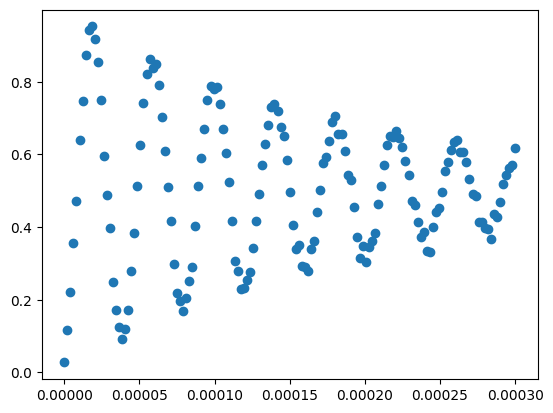

In [19]:
x=np.linspace(0,300*10**-6,149)
plt.scatter(x,count_ratio)
plt.show()

In [20]:
def T2_R(t, A, T2_R,omaga,phi,B):
    return A*np.exp(-t/T2_R)*np.sin(omaga*t+phi)+B
popt, pcov = curve_fit(T2_R, x, count_ratio,p0=[0.5,10**-4,150000,0,0.5], maxfev=5000)

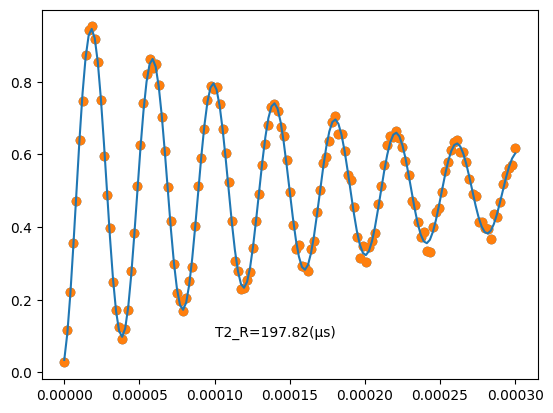

In [21]:
x=np.linspace(0,300*10**-6,149)
yfit = T2_R(x,popt[0], popt[1],popt[2],popt[3],popt[4])
plt.plot(x,yfit)
plt.scatter(x,count_ratio)
plt.scatter(x,count_ratio)
plt.text(0.0001,0.1,'T2_R='+str(round(popt[1]*10**6,2))+'(μs)')
plt.show()

In [22]:
count_ratio=[]
for t in range(1,300,10):
    t=t/10**6
    circ=QuantumCircuit(1,1)
    circ.rx(math.pi/2,0)
    circ.barrier(0)
    circ.delay(t, unit='s')
    circ.barrier(0)
    #circ.rz(math.pi/5,0)
    circ.rz(math.pi*t*10**5,0)
    circ.barrier(0)
    circ.x(0)
    circ.barrier(0)
    circ.rz(-math.pi*t*10**5,0)
    circ.barrier(0)
    circ.delay(t, unit='s')
    circ.barrier(0)
    circ.rx(math.pi/2,0)
    circ.barrier(0)
    circ.measure(0, 0)
    circ = transpile(circ, simulator)
    result_noise = sim_vigo.run(circ).result()
    counts_noise = result_noise.get_counts(0)
    print(counts_noise)
    try:
        one=counts_noise['1']
    except:
        one=0
    try:
        zero=counts_noise['0']
    except:
        zero=0
    count_ratio.append((zero)/(one+zero))

{'0': 920, '1': 104}
{'0': 837, '1': 187}
{'0': 796, '1': 228}
{'1': 286, '0': 738}
{'0': 698, '1': 326}
{'0': 650, '1': 374}
{'0': 625, '1': 399}
{'1': 442, '0': 582}
{'1': 437, '0': 587}
{'1': 465, '0': 559}
{'0': 546, '1': 478}
{'0': 559, '1': 465}
{'0': 550, '1': 474}
{'0': 574, '1': 450}
{'1': 496, '0': 528}
{'1': 524, '0': 500}
{'1': 501, '0': 523}
{'1': 509, '0': 515}
{'1': 517, '0': 507}
{'0': 536, '1': 488}
{'1': 479, '0': 545}
{'1': 498, '0': 526}
{'0': 521, '1': 503}
{'1': 509, '0': 515}
{'1': 506, '0': 518}
{'1': 503, '0': 521}
{'0': 505, '1': 519}
{'1': 496, '0': 528}
{'0': 491, '1': 533}
{'0': 531, '1': 493}


In [23]:
circ.draw(output='mpl')

c:\Users\Tim\.conda\envs\qiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


In [26]:
x=np.linspace(0,300*10**-6,30)
plt.scatter(x,count_ratio)
plt.show()

In [27]:
def T2(t, A, T2,B):
    return A*np.exp(-t/T2)+B
popt, pcov = curve_fit(T2, x, count_ratio,p0=[1,10**-4,0], maxfev=5000)

In [28]:
x=np.linspace(0,300*10**-6,30)
yfit = T2(x,popt[0], popt[1],popt[2])

plt.plot(x,yfit)
plt.scatter(x,count_ratio)
plt.scatter(x,count_ratio)
plt.text(0.00001,0.5,'T2='+str(round(popt[1]*10**6,2))+'(μs)')
plt.show()